In [7]:
import xarray as xr # for data handling
import numpy as np # for maths
import matplotlib as mpl # plotlibrary
import matplotlib.pyplot as plt # for the plots 
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm # for making a log 10 colorscale
import cartopy # library for making maps
from cartopy import crs as ccrs # Projection Library
from cartopy.crs import Stereographic, PlateCarree, Mollweide # Map projections I use00
from cartopy.feature import LAND, COASTLINE # Vectordata of the Coastline and land for making the maps prettier
import cmocean
import gsw


[March File](https://www.pmel.noaa.gov/mimoc/data/MIMOC_Z_GRID_v2.2_CT_SA_month03.nc.gz)

[September File](https://www.pmel.noaa.gov/mimoc/data/MIMOC_Z_GRID_v2.2_CT_SA_month09.nc.gz)

In [8]:
march_file = "MIMOC_Z_GRID_v2.2_CT_SA_month03.nc"
march = xr.open_dataset(march_file, decode_times=False)
march = march.set_coords([
        "LATITUDE", "LONGITUDE", "PRESSURE",
    ]).set_index(indexes={
        "LAT":"LATITUDE", "LONG": "LONGITUDE", "PRES": "PRESSURE",
    }).rename_dims({
        "LAT":"lat", "LONG":"lon", "PRES":"pressure"
    }).rename_vars({
        "LAT":"lat", "LONG":"lon", "PRES":"pressure"
    })
march.info

<bound method Dataset.info of <xarray.Dataset> Size: 159MB
Dimensions:                   (pressure: 81, lat: 341, lon: 720)
Coordinates:
  * pressure                  (pressure) float32 324B 0.0 5.0 ... 1.95e+03
  * lat                       (lat) float32 1kB -80.0 -79.5 -79.0 ... 89.5 90.0
  * lon                       (lon) float32 3kB 0.0 0.5 1.0 ... 359.0 359.5
Data variables:
    ABSOLUTE_SALINITY         (pressure, lat, lon) float32 80MB ...
    CONSERVATIVE_TEMPERATURE  (pressure, lat, lon) float32 80MB ...>

In [9]:
sept_file = "MIMOC_Z_GRID_v2.2_CT_SA_month09.nc"
sept = xr.open_dataset(sept_file, decode_times=False)
sept = sept.set_coords([
        "LATITUDE", "LONGITUDE", "PRESSURE",
    ]).set_index(indexes={
        "LAT":"LATITUDE", "LONG": "LONGITUDE", "PRES": "PRESSURE",
    }).rename_dims({
        "LAT":"lat", "LONG":"lon", "PRES":"pressure"
    }).rename_vars({
        "LAT":"lat", "LONG":"lon", "PRES":"pressure"
    })
sept.info

<bound method Dataset.info of <xarray.Dataset> Size: 159MB
Dimensions:                   (pressure: 81, lat: 341, lon: 720)
Coordinates:
  * pressure                  (pressure) float32 324B 0.0 5.0 ... 1.95e+03
  * lat                       (lat) float32 1kB -80.0 -79.5 -79.0 ... 89.5 90.0
  * lon                       (lon) float32 3kB 0.0 0.5 1.0 ... 359.0 359.5
Data variables:
    ABSOLUTE_SALINITY         (pressure, lat, lon) float32 80MB ...
    CONSERVATIVE_TEMPERATURE  (pressure, lat, lon) float32 80MB ...>

North Atlantic: 10deg N to 50deg N by 70deg W to 0deg E

South Atlantic: 10deg S to 50deg S by 70deg W to 0deg E

70 deg W = 290 deg E

1000m = 100.38bar = 1003.8dbar

In [10]:
n_atl = march.sel(lat=slice(10, 50), lon=slice(290, 360))
s_atl = sept.sel(lat=slice(-50, -10), lon=slice(290, 360))

abs_sal = np.linspace(29,40,51)
con_temp = np.linspace(-5,30,51)
sal_temp_grid = np.meshgrid(abs_sal, con_temp)
sigma0 = gsw.density.sigma0(sal_temp_grid[0], sal_temp_grid[1])
sigma1 = gsw.density.sigma1(sal_temp_grid[0], sal_temp_grid[1])
# plt.contour(density)
density = xr.Dataset(
        data_vars=dict(
                sigma0=(["con_temp","abs_sal"], sigma0),
                sigma1=(["con_temp","abs_sal"], sigma1),
                ),
        coords=dict(
                abs_sal=("abs_sal", abs_sal),
                con_temp=("con_temp", con_temp),
        )
)

abs_sal = np.linspace(33,38,51)
con_temp = np.linspace(-1,28,51)
sal_temp_grid = np.meshgrid(abs_sal, con_temp)
sigma0 = gsw.density.sigma0(sal_temp_grid[0], sal_temp_grid[1])
sigma1 = gsw.density.sigma1(sal_temp_grid[0], sal_temp_grid[1])
# plt.contour(density)
density2 = xr.Dataset(
        data_vars=dict(
                sigma0=(["con_temp","abs_sal"], sigma0),
                sigma1=(["con_temp","abs_sal"], sigma1),
                ),
        coords=dict(
                abs_sal=("abs_sal", abs_sal),
                con_temp=("con_temp", con_temp),
        )
)

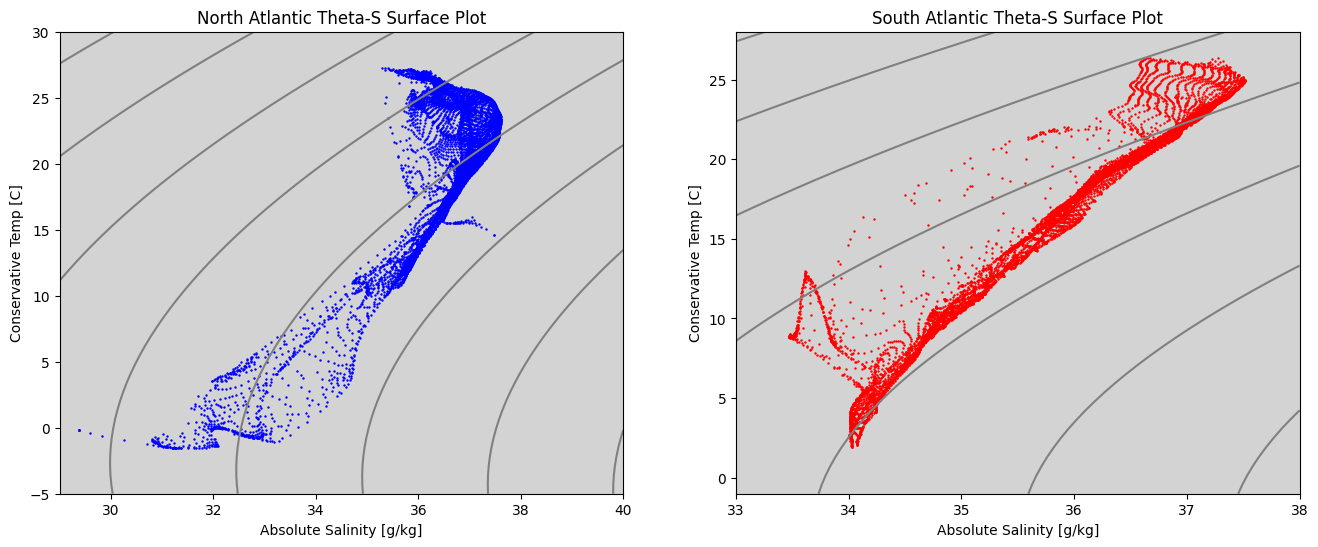

In [14]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, facecolor="lightgray")
density.sigma0.plot.contour(ax=ax1, colors="gray")

n_atl.sel(pressure=0).plot.scatter(
    ax=ax1,
    x="ABSOLUTE_SALINITY", y="CONSERVATIVE_TEMPERATURE", 
    edgecolor="#00000000",
    s=3,
    c="blue"
)

ax2 = fig.add_subplot(122, facecolor="lightgray")
density2.sigma0.plot.contour(ax=ax2, colors="gray")

s_atl.sel(pressure=0).plot.scatter(
    ax=ax2,
    x="ABSOLUTE_SALINITY", y="CONSERVATIVE_TEMPERATURE", 
    edgecolor="#00000000",
    s=3,
    c="red"
)

ax1.set_title("North Atlantic Theta-S Surface Plot")
ax1.set_ylabel("Conservative Temp [C]")
ax1.set_xlabel("Absolute Salinity [g/kg]")
ax2.set_title("South Atlantic Theta-S Surface Plot")
ax2.set_ylabel("Conservative Temp [C]")
ax2.set_xlabel("Absolute Salinity [g/kg]")

plt.show()

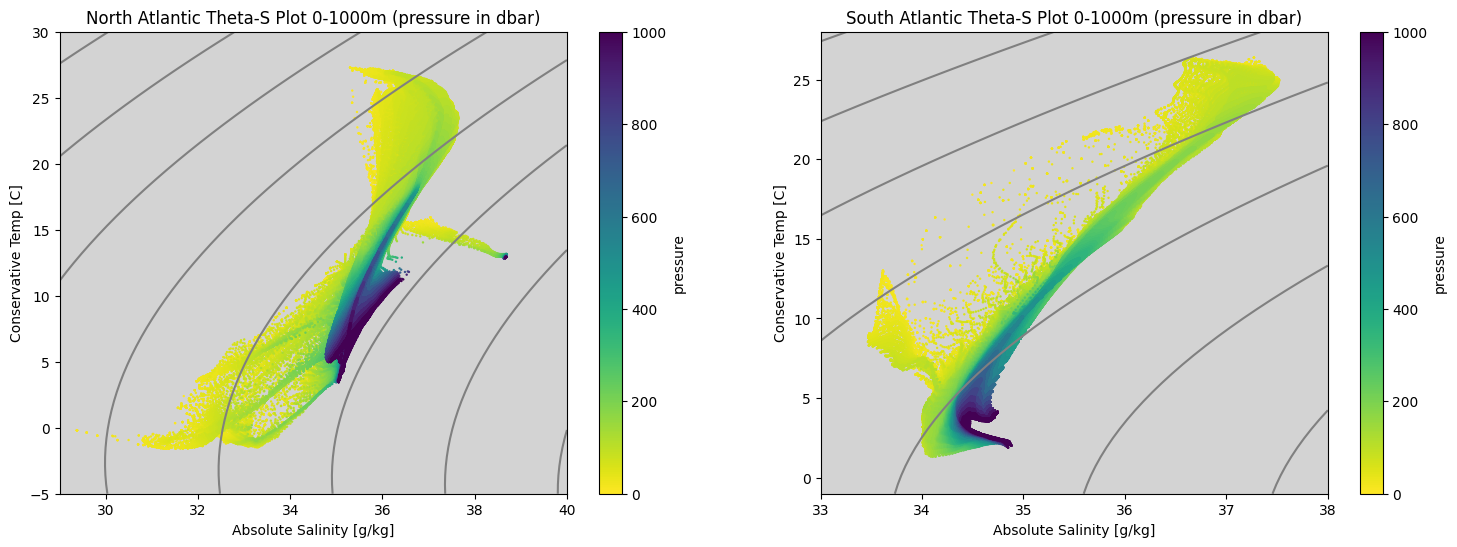

In [12]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(121, facecolor="lightgray")
density.sigma0.plot.contour(ax=ax1, colors="gray")

n_atl.sel(pressure=slice(0,1003)).plot.scatter(
    ax=ax1,
    x="ABSOLUTE_SALINITY", y="CONSERVATIVE_TEMPERATURE", 
    hue="pressure", 
    edgecolor="#00000000",
    cmap="viridis_r",
    s=3,
)

ax2 = fig.add_subplot(122, facecolor="lightgray")
density2.sigma0.plot.contour(ax=ax2, colors="gray")

s_atl.sel(pressure=slice(0,1003)).plot.scatter(
    ax=ax2,
    x="ABSOLUTE_SALINITY", y="CONSERVATIVE_TEMPERATURE", 
    hue="pressure", 
    edgecolor="#00000000",
    cmap="viridis_r",
    s=3,
)

ax1.set_title("North Atlantic Theta-S Plot 0-1000m (pressure in dbar)")
ax1.set_ylabel("Conservative Temp [C]")
ax1.set_xlabel("Absolute Salinity [g/kg]")
ax2.set_title("South Atlantic Theta-S Plot 0-1000m (pressure in dbar)")
ax2.set_ylabel("Conservative Temp [C]")
ax2.set_xlabel("Absolute Salinity [g/kg]")

plt.show()